### 1 -> ham mails
### 0 -> spam mails

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sqlite3
import pickle

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import MultinomialNB 

In [3]:
conn = sqlite3.connect('Emails.sqlite')
final = pd.read_sql_query("""SELECT * FROM Emails""", conn)
conn.close()
final.head()

,index,Emails,lable,CleanedMails
0,0,"slur . . . mean , sir : armey 's slip slip , s...",1,slur mean sir armey slip slip slip sort repres...
1,1,across mail 12 re : punctuation . email punctu...,1,across mail punctuat email punctuat discuss gr...
2,2,subject : begin begin begin groundfloor someth...,0,subject begin begin begin groundfloor someth u...
3,3,nice true democracy try reach agreement phonet...,1,nice true democraci tri reach agreement phonet...
4,4,read research literature slip tongue scan both...,1,read research literatur slip tongu scan normal...


In [4]:
final['lable'].value_counts()

1    481
0    481
Name: lable, dtype: int64

In [5]:
bow_vect = CountVectorizer(binary = False)
bow = bow_vect.fit_transform(final['CleanedMails'].values)

In [7]:
X = bow
y = final['lable'].values

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, shuffle = False)

optimal value of alpha:  0.1


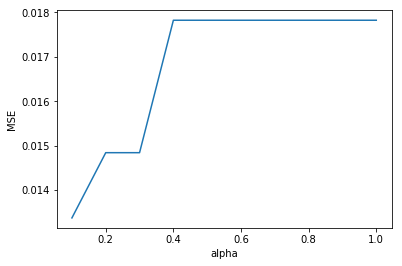

In [9]:
alpha = np.linspace(0.1,1,10)
cv_scores = []

for a in alpha:
    clf = MultinomialNB(alpha = a)
    scores = cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1-x for x in cv_scores]

optimal_alpha = alpha[MSE.index(min(MSE))]
print("optimal value of alpha: ",optimal_alpha)

plt.plot(alpha,MSE)
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.show()

optimal value of alpha:  0.15


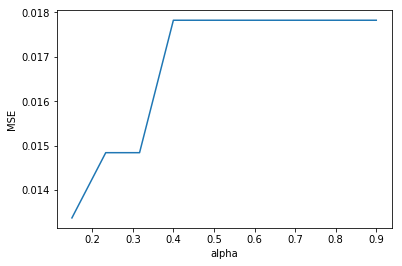

In [10]:
alpha = np.linspace(0.9,0.15,10)
cv_scores = []

for a in alpha:
    clf = MultinomialNB(alpha = a)
    scores = cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1-x for x in cv_scores]

optimal_alpha = alpha[MSE.index(min(MSE))]
print("optimal value of alpha: ",optimal_alpha)

plt.plot(alpha,MSE)
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.show()

optimal value of alpha:  0.15


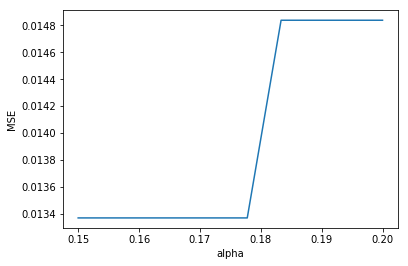

In [11]:
alpha = np.linspace(0.15,0.2,10)
cv_scores = []

for a in alpha:
    clf = MultinomialNB(alpha = a)
    scores = cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1-x for x in cv_scores]

optimal_alpha = alpha[MSE.index(min(MSE))]
print("optimal value of alpha: ",optimal_alpha)

plt.plot(alpha,MSE)
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.show()

In [12]:
clf = MultinomialNB(alpha = optimal_alpha)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred, normalize=True)*float(100)
print(acc)
confusion_matrix(y_test,y_pred).T

99.30795847750865


array([[142,   0],
       [  2, 145]], dtype=int64)